In [1]:
# Import necessary libraries
import keras
from keras.datasets import cifar10  # Dataset of 50,000 32x32 color training images and 10,000 test images
from keras.models import Sequential  # Sequential model
from keras import datasets, layers, models  # Additional Keras modules
from keras.utils import to_categorical  # Utility functions for Keras
from keras import regularizers  # Regularizers for model
from keras.layers import Dense, Dropout, BatchNormalization  # Layer types
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from keras.applications import VGG16

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Filtering out images of cats and dogs
train_mask = np.where((train_labels != 3) & (train_labels != 5))[0]
test_mask = np.where((test_labels != 3) & (test_labels != 5))[0]

In [4]:
train_images = train_images[train_mask]
train_labels = train_labels[train_mask]
test_images = test_images[test_mask]
test_labels = test_labels[test_mask]

# Checking the number of rows (records) and columns (features) after filtering
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(40000, 32, 32, 3)
(40000, 1)
(8000, 32, 32, 3)
(8000, 1)


In [5]:
# Checking the number of unique classes
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 4 6 7 8 9]
[0 1 2 4 6 7 8 9]


In [6]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

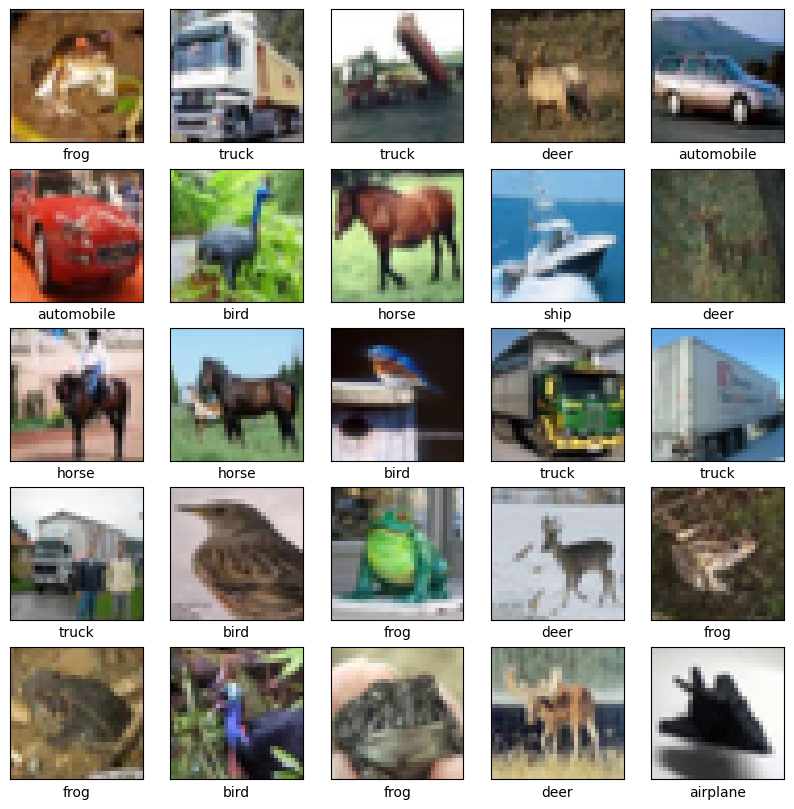

In [7]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [8]:
# Convert the pixel values of images to float type for precision
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize the images to a range of 0 to 1 for better performance
train_images /= 255.0
test_images /= 255.0

# Number of classes in the CIFAR-10 dataset
num_classes = 10

# Apply one-hot encoding to the labels to convert them into binary class matrices
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [9]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [10]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=30,
                    validation_data=(test_images, test_labels))

Epoch 1/30
625/625 [==============================] - 19s 13ms/step - loss: 1.6035 - accuracy: 0.4496 - val_loss: 1.1444 - val_accuracy: 0.5716
Epoch 2/30
625/625 [==============================] - 8s 13ms/step - loss: 1.0086 - accuracy: 0.6329 - val_loss: 0.9131 - val_accuracy: 0.6699
Epoch 3/30
625/625 [==============================] - 8s 12ms/step - loss: 0.8038 - accuracy: 0.7125 - val_loss: 0.6716 - val_accuracy: 0.7569
Epoch 4/30
625/625 [==============================] - 8s 12ms/step - loss: 0.7140 - accuracy: 0.7467 - val_loss: 0.6430 - val_accuracy: 0.7706
Epoch 5/30
625/625 [==============================] - 8s 12ms/step - loss: 0.6387 - accuracy: 0.7742 - val_loss: 0.5588 - val_accuracy: 0.8039
Epoch 6/30
625/625 [==============================] - 8s 12ms/step - loss: 0.5868 - accuracy: 0.7942 - val_loss: 0.5659 - val_accuracy: 0.8049
Epoch 7/30
625/625 [==============================] - 8s 13ms/step - loss: 0.5507 - accuracy: 0.8063 - val_loss: 0.5404 - val_accuracy: 0.812

Text(0.5, 1.0, 'Accuracy Curves')

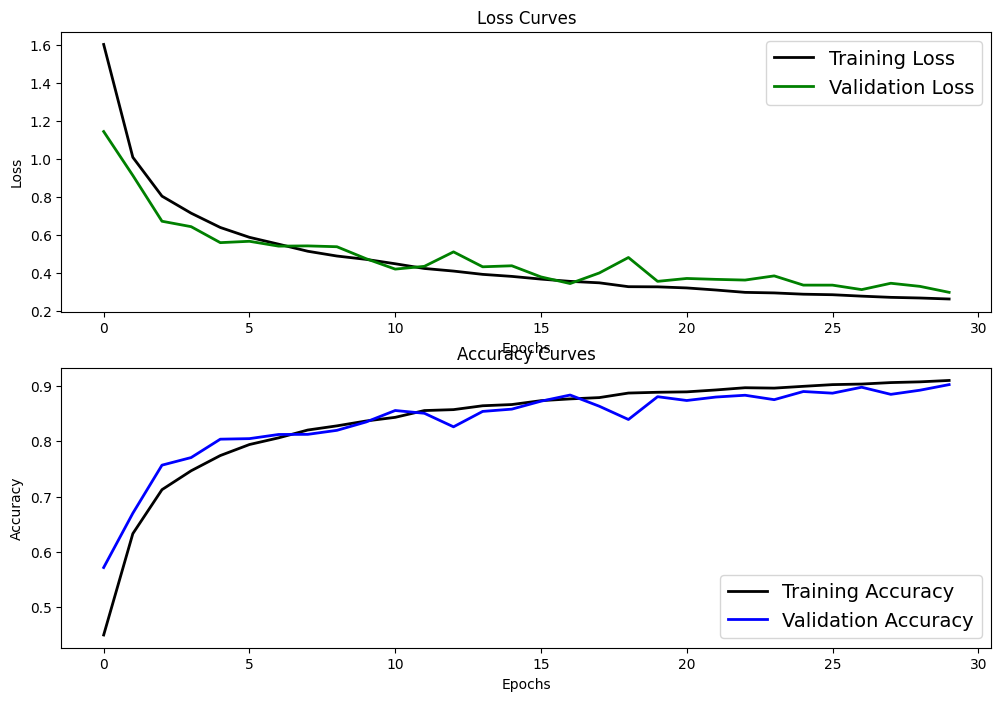

In [12]:
# Create a figure with two subplots
plt.figure(figsize=[12, 8])

# Loss curve
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [13]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

250/250 [==============================] - 1s 2ms/step
[[9.7288594e-06 8.4265976e-06 5.0272136e-10 ... 4.4738362e-11
  9.9998176e-01 1.0084941e-07]
 [3.7468001e-04 4.2070905e-03 1.2045092e-05 ... 2.5348524e-07
  9.9523395e-01 1.4241498e-04]
 [9.9172884e-01 2.5112150e-04 2.7472593e-04 ... 2.3095201e-06
  7.3692068e-03 3.6662677e-04]
 ...
 [3.3736032e-02 4.1711866e-04 1.1912019e-03 ... 4.1435999e-03
  9.4430202e-01 4.1332122e-04]
 [8.8790030e-04 9.9877697e-01 1.6855196e-05 ... 3.9932866e-06
  3.1175321e-06 2.4165526e-04]
 [9.2977723e-07 5.9523472e-06 1.1172441e-05 ... 9.9906021e-01
  1.4983208e-07 3.8396132e-07]]
[8 8 0 ... 8 1 7]


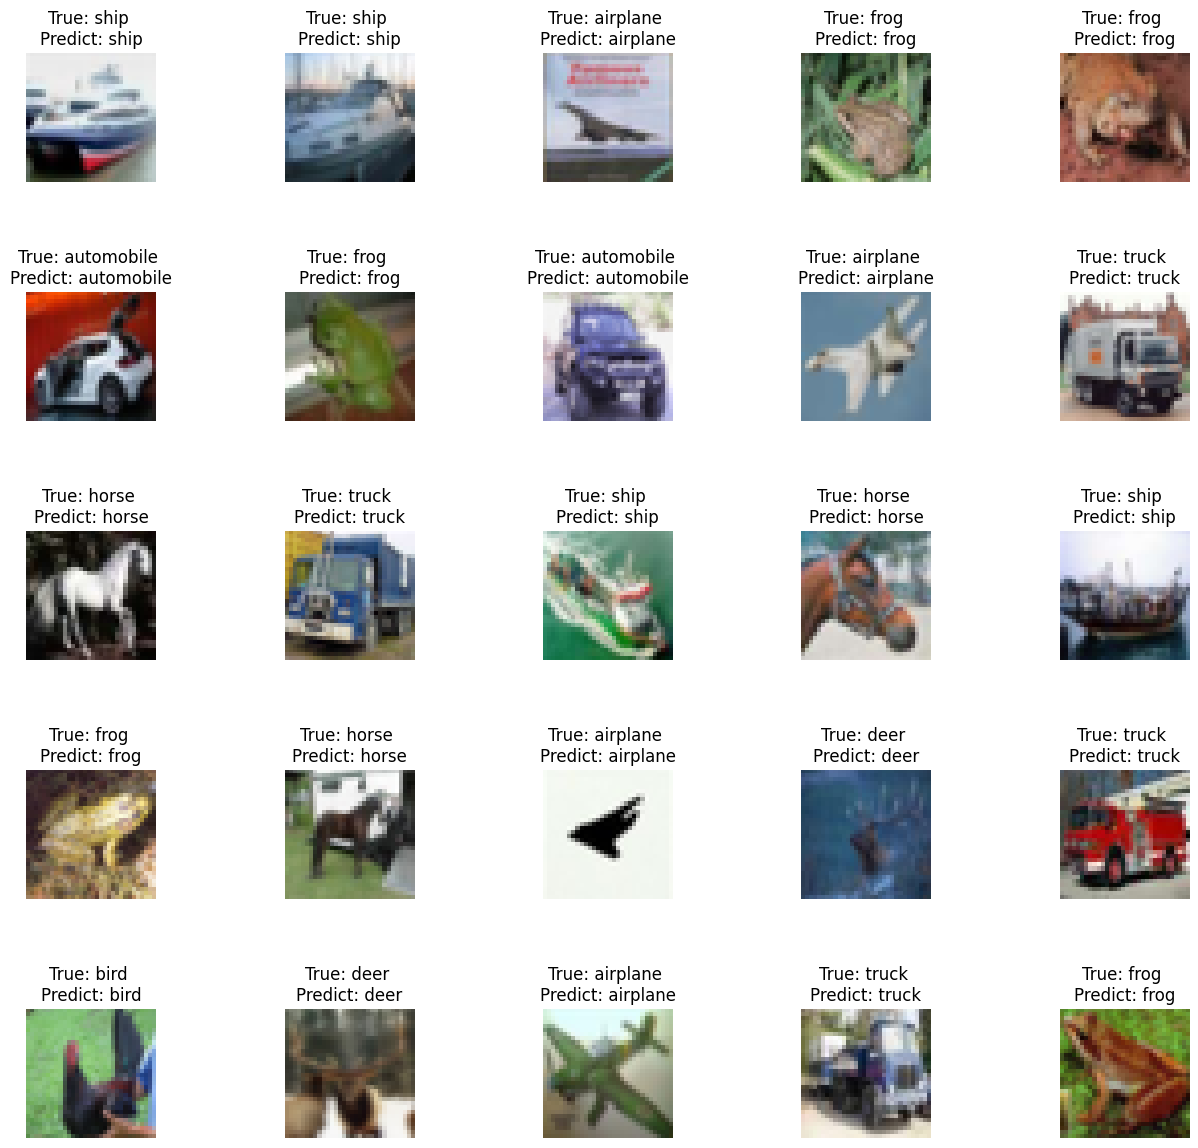

In [14]:
# Plotting the Actual vs. Predicted results

# Create a figure with a grid of 5x5 subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the first 25 test images
for i in np.arange(0, 25):
    # Display the image in the subplot
    axes[i].imshow(test_images[i])

    # Set the title of the subplot to show the true and predicted class labels
    axes[i].set_title("True: %s \nPredict: %s" % (
        class_names[np.argmax(test_labels[i])],  # True label
        class_names[pred_classes[i]]             # Predicted label
    ))

    # Remove the axis to make the plot cleaner
    axes[i].axis('off')

# Adjust the spacing between subplots for better layout
plt.subplots_adjust(wspace=1)

# Display the plot
plt.show()

# Pre-Trained Model

In [15]:
from keras.applications import VGG16  # Import the VGG16 model
from keras import Model  # Import Model to build our custom model
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization

# Load the VGG16 model, excluding the top layers, and using input shape as CIFAR-10 images
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers so they won't be trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)  # Flatten the output
x = Dense(512, activation='relu')(x)  # Add a dense layer
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(num_classes, activation='softmax')(x)  # Final output layer with softmax activation

# Create the complete model
model = Model(inputs=base_model.input, outputs=x)

58889256/58889256 [==============================] - 0s 0us/step


In [16]:
# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [17]:
# Train the model with training data
history = model.fit(train_images, train_labels, batch_size=64, epochs=30,
                    validation_data=(test_images, test_labels))

Epoch 1/30
625/625 [==============================] - 11s 14ms/step - loss: 1.2970 - accuracy: 0.5528 - val_loss: 1.0452 - val_accuracy: 0.6209
Epoch 2/30
625/625 [==============================] - 8s 13ms/step - loss: 1.0638 - accuracy: 0.6192 - val_loss: 1.0105 - val_accuracy: 0.6389
Epoch 3/30
625/625 [==============================] - 9s 14ms/step - loss: 1.0244 - accuracy: 0.6277 - val_loss: 0.9991 - val_accuracy: 0.6396
Epoch 4/30
625/625 [==============================] - 8s 13ms/step - loss: 0.9996 - accuracy: 0.6410 - val_loss: 0.9773 - val_accuracy: 0.6449
Epoch 5/30
625/625 [==============================] - 8s 13ms/step - loss: 0.9859 - accuracy: 0.6459 - val_loss: 0.9751 - val_accuracy: 0.6451
Epoch 6/30
625/625 [==============================] - 8s 13ms/step - loss: 0.9721 - accuracy: 0.6518 - val_loss: 0.9583 - val_accuracy: 0.6538
Epoch 7/30
625/625 [==============================] - 8s 13ms/step - loss: 0.9586 - accuracy: 0.6536 - val_loss: 0.9671 - val_accuracy: 0.648

Text(0.5, 1.0, 'Accuracy Curves')

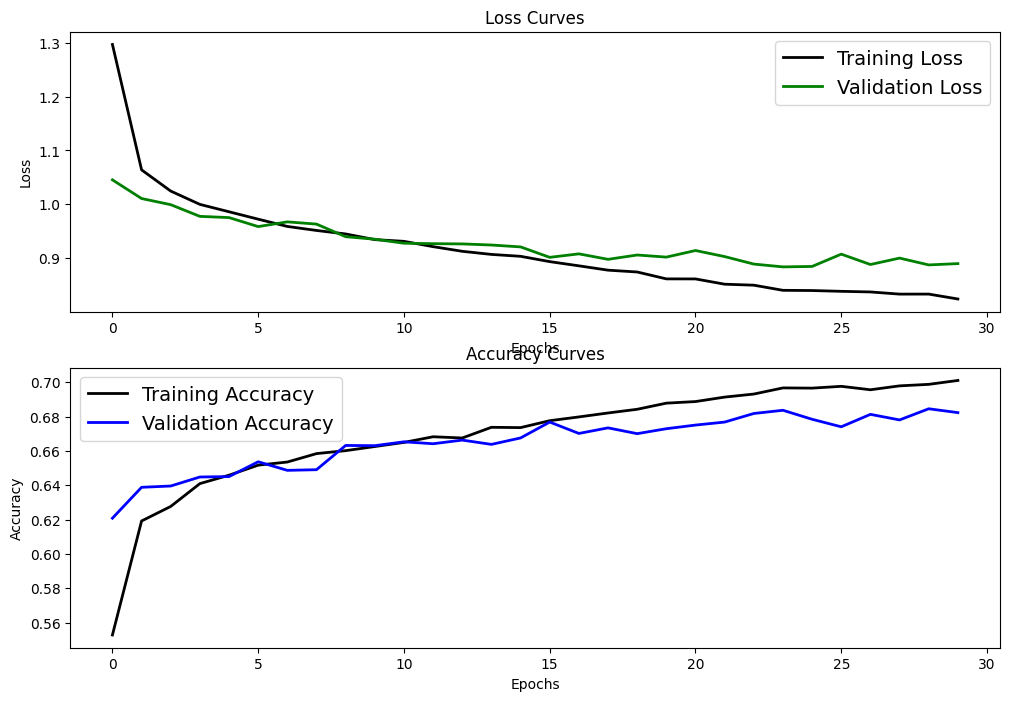

In [18]:
# Create a figure with two subplots for the loss and accuracy curves
plt.figure(figsize=[12, 8])

# Loss curve
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

250/250 [==============================] - 3s 7ms/step
[[3.7011616e-02 2.2660348e-01 1.8459866e-03 ... 4.7933656e-05
  7.2753513e-01 6.7547741e-03]
 [5.5519603e-02 2.6837507e-02 1.2320095e-03 ... 1.3000568e-02
  8.2192272e-01 3.7353851e-02]
 [1.1538927e-01 2.2264135e-01 4.1397206e-02 ... 2.5801603e-03
  2.8228277e-01 3.2701090e-01]
 ...
 [1.8128475e-02 1.8991552e-05 7.0401197e-03 ... 5.5878139e-03
  3.4636147e-02 2.4868805e-05]
 [7.0708376e-01 5.0169020e-03 6.1443206e-02 ... 5.5879023e-02
  1.9250559e-02 1.0268399e-01]
 [3.1717352e-04 6.4127926e-05 5.3363020e-04 ... 9.8336673e-01
  1.1605293e-04 1.8197264e-03]]
[8 8 9 ... 6 0 7]


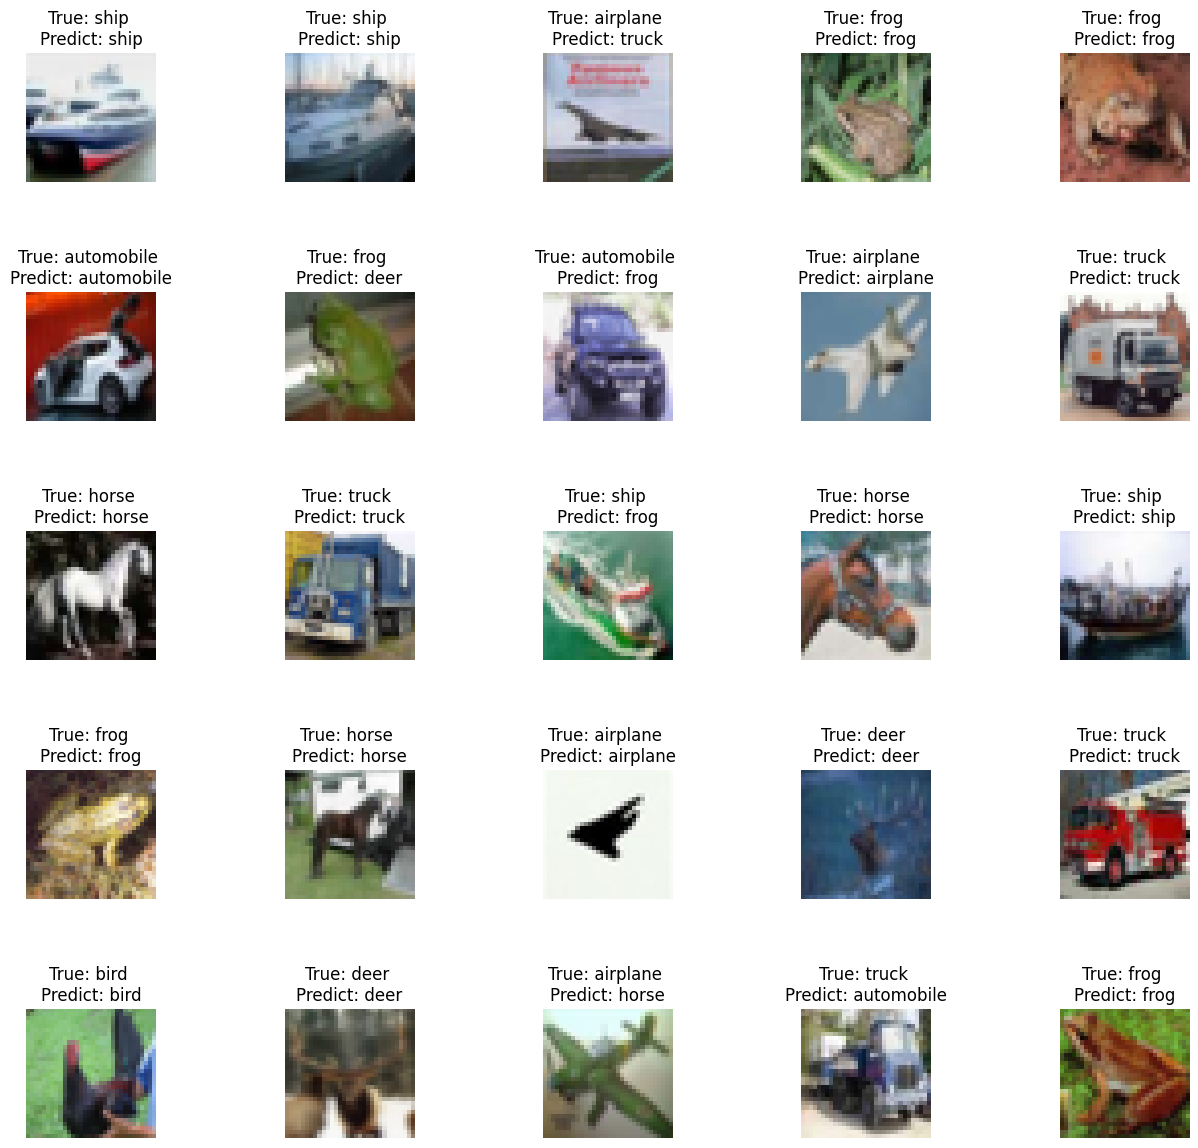

In [19]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

# Plotting the Actual vs. Predicted results

# Create a figure with a grid of 5x5 subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the first 25 test images
for i in np.arange(0, 25):
    # Display the image in the subplot
    axes[i].imshow(test_images[i])

    # Set the title of the subplot to show the true and predicted class labels
    axes[i].set_title("True: %s \nPredict: %s" % (
        class_names[np.argmax(test_labels[i])],  # True label
        class_names[pred_classes[i]]             # Predicted label
    ))

    # Remove the axis to make the plot cleaner
    axes[i].axis('off')

# Adjust the spacing between subplots for better layout
plt.subplots_adjust(wspace=1)

# Display the plot
plt.show()